In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/uci-secom.csv')

In [5]:
#5개의 행을 확인
data.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [6]:
#data 정보확인
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


(1567, 592)

In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1566.000000,1566.000000,1566.000000,1566.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,618.000000,618.000000,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,0.000146,0.964353,199.956809,0.0,9.005371,413.086035,9.907603,0.971444,190.047354,12.481034,1.405054,-5618.393610,2699.378435,-3806.299734,-298.598136,1.203845,1.938477,6.638628,69.499532,2.366197,0.184159,3.673189,85.337469,8.960279,50.582639,64.555787,49.417370,66.221274,86.836577,118.679554,...,1.230712,0.276688,7.703874,0.503657,57.746537,4.216905,1.623070,0.995009,0.325708,0.072443,32.284956,262.729683,0.679641,6.444985,0.145610,2.610870,0.060086,2.452417,21.117674,530.523623,2.101836,28.450165,0.345636,9.162315,0.104729,5.563747,16.642363,0.021615,0.016829,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,0.009302,0.012452,3.257276,0.0,2.796596,17.221095,2.403867,0.012062,2.781041,0.217965,0.016737,626.822178,295.498535,1380.162148,2902.690117,0.177600,0.189495,1.244249,3.461181,0.408694,0.032944,0.535322,2.026549,1.344456,1.182618,2.574749,1.182619,0.304141,0.446756,1.807221,...,1.361117,0.276231,2.192647,0.598852,35.207552,1.280008,1.870433,0.083860,0.201392,0.051578,19.026081,7.630585,0.121758,2.633583,0.081122,1.032761,0.032761,0.996644,10.213294,17.499736,0.275112,86.304681,0.248478,26.920150,0.067791,16.921369,12.485267,0.011730,0.009640,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,-0.034900,0.655400,182.094000,0.0,2.249300,333.448600,4.469600,0.579400,169.177400,9.877300,1.179700,-7150.250000,0.000000,-9986.750000,-14804.500000,0.000000,0.000000,0.000000,59.400000,0.666700,0.034100,2.069800,83.182900,7.603200,49.834800,63.677400,40.228900,64.919300,84.732700,111.712800,...,0.120000,0.018700,2.786000,0.052000,4.826900,1.496700,0.164600,0.891900,0.069900,0.017700,7.236900,242.286000,0.304900,0.970000,0.022400,0.412200,0.009100,0.370600,3.250400,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,-0.016900,0.003200,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,-0.005600,0.958100,198.130700,0.0,7.094875,406.127400,9.567625,0.968200,188.299825,12.460000,1.396500,-5933.250000,2578.000000,-4371.750000,-1476.000000,1.094800,1.906500,5.263700,67.377800,2.088900,0.161700,3.362700,84.490500,8.580000,50.252350,64.024800,49.421200,66.040650,86.578300,118.015600,...,0.870000,0.094900,6.738100,0.343800,27.017600,3.625100,1.182900,0.9

In [28]:
#결측값 정보확인
data.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 591, dtype: int64

In [29]:
#모든 데이터를 사용하기 위해서는 결측값을 0으로 대체
data = data.replace(np.NaN, 0)

In [10]:
# 'Time'변수의 데이터는 pass/fail을 예측하는데 도움이 미미할것으로 판단 제거
data = data.drop(columns = ['Time'], axis = 1)

data.shape

(1567, 591)

In [11]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,0.000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.0000,0.0000,0.0000,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,0.000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,0.000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.0000,0.0000,0.0000,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,0.80,0.4754,8.5138,0.3141,85.1806,4.2063,1.0367,1.0972,0.3553,0.0929,32.3812,264.272,0.5671,4.98,0.0877

#데이터 시각화

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

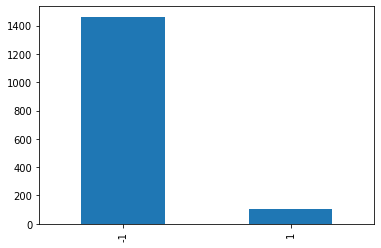

In [13]:
# value_counts()로 합계도출
data['Pass/Fail'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인
data['Pass/Fail'].value_counts()

In [14]:
# 590개 센서에 대한 출력을 pairplot으로 수행하기엔 출력 결과도 보기 힘들뿐더러 출력 시간도 매우 오래 걸림
# 따라서 아래 코드와 같이 3,4,5, Pass/Fail 데이터에 대해서만 출력
data_test= data[['3','4','5','Pass/Fail']]
data_test

,3,4,5,Pass/Fail
0,1411.1265,1.3602,100.0,-1
1,1463.6606,0.8294,100.0,-1
2,1698.0172,1.5102,100.0,1
3,909.7926,1.3204,100.0,-1
4,1326.5200,1.5334,100.0,-1
...,...,...,...,...
1562,3085.3781,1.4843,100.0,-1
1563,1124.6595,0.8763,100.0,-1
1564,1110.4967,0.8236,100.0,-1
1565,1183.7287,1.5726,100.0,-1


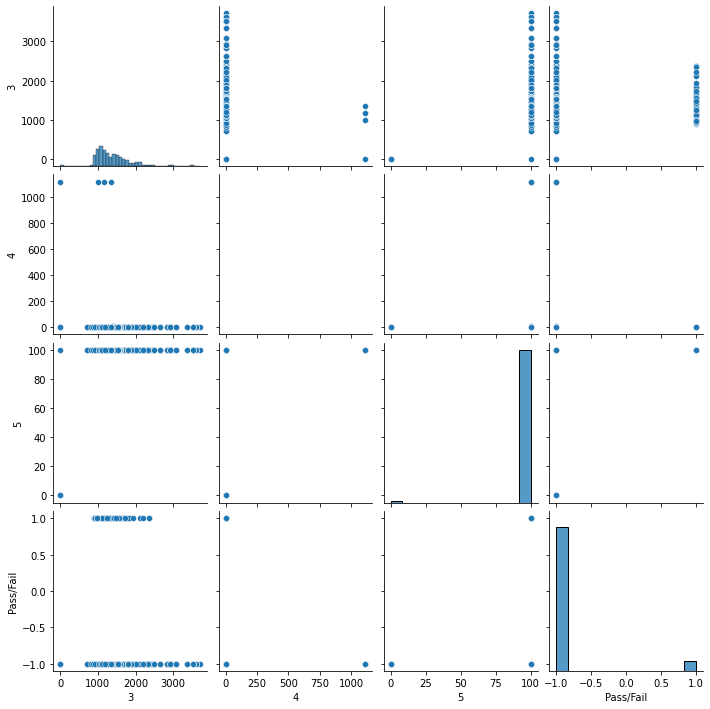

In [15]:
sns.pairplot(data_test)

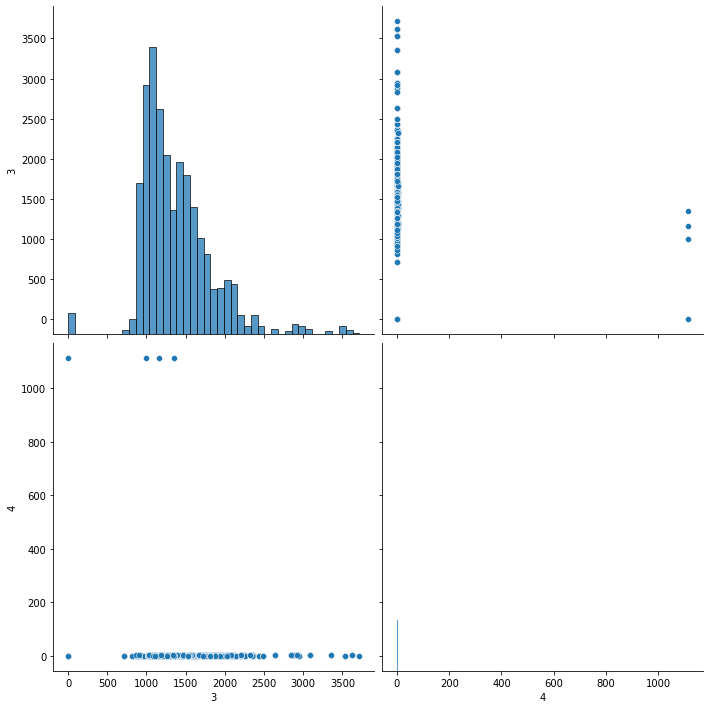

In [16]:
sns.pairplot(data_test,height=5, vars=['3','4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '59 Sensor Measurements')

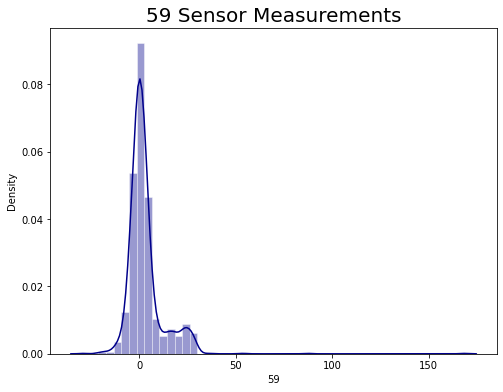

In [17]:
# figsize(가로, 세로)로 크기를 정합니다. 
fig, ax = plt.subplots(figsize=(8, 6))

# seborn 그래프의 스타일을 설정
# style에 white, whitegrid, dark 등을 넣어서 스타일을 바꿀 수 있습니다.
sns.set(style='darkgrid')

# 59번 데이터의 분포를 출력
# displot로 분포도 출력
# yellow, green 색 넣기
sns.distplot(data['59'], color = 'darkblue')

# 그래프의 제목을 설정
plt.title('59 Sensor Measurements', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, '59 Sensor Measurements')

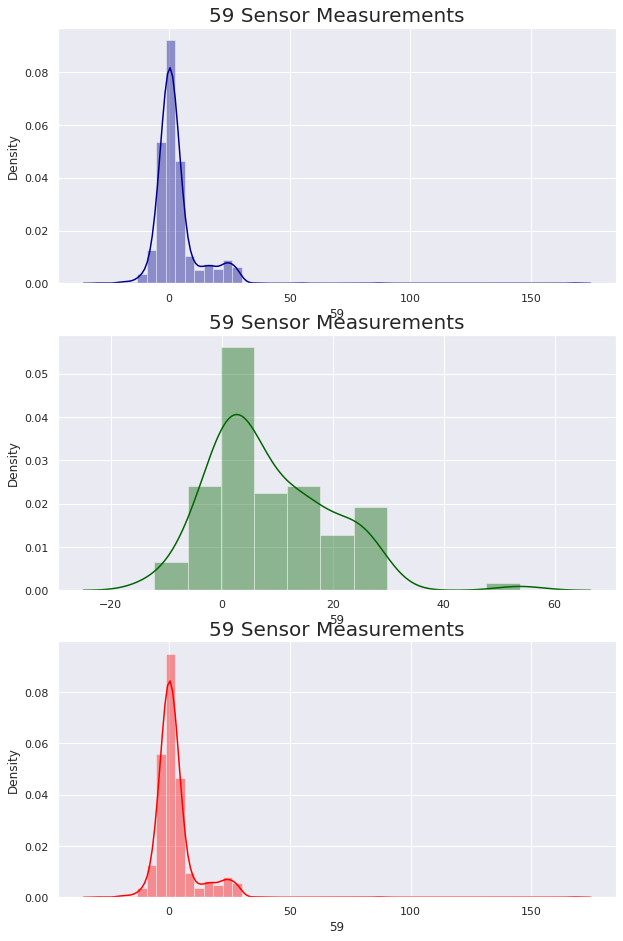

In [18]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다. 
plt.rcParams['figure.figsize'] = (10, 16)

# 3x1 형태로 그래프를 출력하기 위하여 subplot을 설정합니다. 
# subplot(행, 열, 인덱스)로 그래프의 위치를 정합니다. 
plt.subplot(3, 1, 1)
sns.distplot(data['59'], color = 'darkblue')
plt.title('59 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 1인 데이터를 출력합니다.
#  data[data['Pass/Fail']==1]를 하면 'Pass/Fail' 값이 1인 행만 사용할 수 있습니다.
plt.subplot(3, 1, 2)
sns.distplot(data[data['Pass/Fail']==1]['59'], color = 'darkgreen')
plt.title('59 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 -1인 데이터를 출력합니다.
plt.subplot(3, 1, 3)
sns.distplot(data[data['Pass/Fail']==-1]['59'], color = 'red')
plt.title('59 Sensor Measurements', fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, '59 Sensor Measurements')

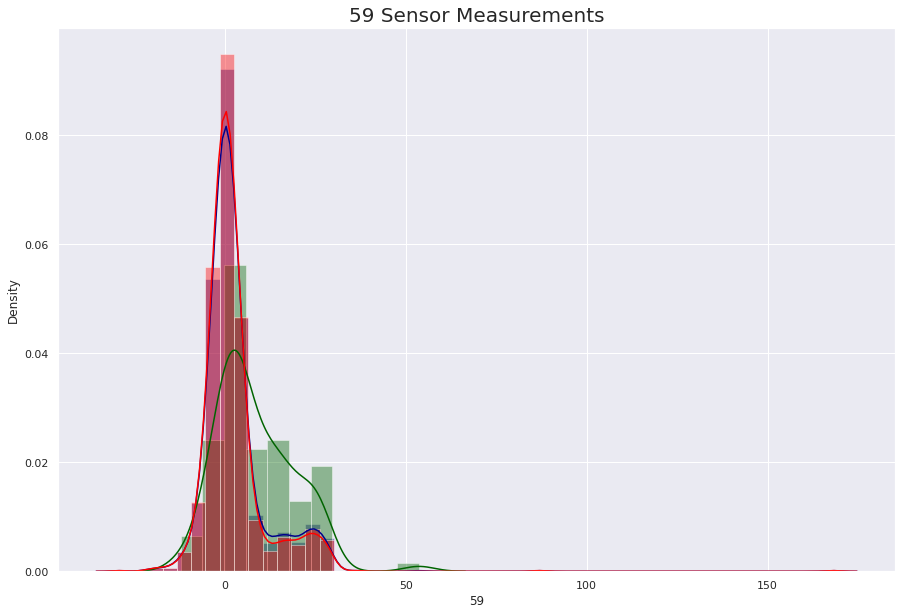

In [19]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다.
plt.rcParams['figure.figsize'] = (15, 10)

# 위 나누어 출력 했던 그래프를 한번에 출력합니다.
sns.distplot(data['59'], color = 'darkblue')
sns.distplot(data[data['Pass/Fail']==1]['59'], color = 'darkgreen')
sns.distplot(data[data['Pass/Fail']==-1]['59'], color = 'red')

# 제목과 폰트크기를 정합니다.
plt.title('59 Sensor Measurements', fontsize = 20)

#데이터 전 처리

In [20]:
# 예측해야 할 변수인 `Pass/Fail`를 제거하여 머신러닝 입력값인 x에 저장
# data에는 'Pass/Fail'의 없어집니다. 
x = data.drop(columns = ['Pass/Fail'], axis = 1)

# 예측해야 할 변수 `Pass/Fail`만을 선택하여 numpy 형태로 y에 저장
y = data['Pass/Fail']

# ravel은 "풀다"로 다차원을 1차원으로 푸는 것을 의미
# 1차원 벡터 형태로 출력하기 위해 ravel 사용
y = y.to_numpy().ravel() 
y

array([-1, -1,  1, ..., -1, -1, -1])

In [31]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,0.000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.0000,0.0000,0.0000,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,0.000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,0.000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.0000,0.0000,0.0000,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,16.90,0.80,0.4754,8.5138,0.3141,85.1806,4.2063,1.0367,1.0972,0.3553,0.0929,32.3812,264.272,0

In [21]:
#타입확인
type(y)

numpy.ndarray

In [22]:
#원본 데이터의 수가 많지 않기에 원본 데이터에서 샘플 데이터를 추출하고 노이즈를 추가하여 테스트 데이터를 생성
#data 폴더 내의 uci-secom-test.csv에 590개의 센서 데이터와 Pass/Fail저장되어 있기에 해당 데이터를 읽어와 x_test, y_test 데이터로 분리

In [34]:
# data 폴더 내의 uci-secom-test.csv를 DataFrame으로 읽고 x_test, y_test로 분리
data_test = pd.read_csv("/content/uci-secom-test.csv")
x_test = data_test.drop(columns = ['Pass/Fail'], axis = 1)
y_test = data_test['Pass/Fail'].to_numpy().ravel() 

In [35]:
x_test


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3058.576438,2456.188003,2174.584701,1113.987638,1.017292,100.0,103.784665,0.124100,1.373089,0.008796,-0.003727,0.969266,200.183342,0.0,8.919641,418.130286,9.824980,0.972750,190.358341,12.509359,1.409866,-5380.236045,2495.622725,-3971.623079,-5189.613774,1.336640,2.017815,7.337354,64.889964,2.299922,0.191570,3.352448,86.676606,8.881218,50.529534,64.061359,49.470466,66.414149,87.023944,118.383399,...,13.468879,0.625539,0.249424,6.694769,0.225907,46.659967,3.303557,0.841152,0.977609,0.566931,0.103483,57.994498,266.282422,0.655058,11.010520,0.106034,3.969829,0.042533,4.138134,16.050278,530.769974,2.089141,10.438365,0.314094,3.605207,0.105887,1.966346,14.984422,0.019479,0.013223,0.004038,53.973861,0.502555,0.012549,0.003425,2.494222,0.021644,0.017824,0.005433,98.028276
1,3225.540000,2500.380000,2211.400000,1511.784200,1.300400,100.0,97.470000,0.123700,1.367100,-0.019700,0.005600,0.963800,197.652500,0.0,11.903900,404.917500,9.947500,0.970700,187.704900,12.401800,1.352200,-5663.500000,2666.500000,-5367.500000,-10169.000000,1.249200,1.969800,7.283000,68.588900,1.744400,0.140800,3.518900,86.977900,8.835600,50.652700,63.971900,49.347300,66.398900,86.385600,118.253000,...,17.520000,1.020000,0.206500,7.688000,0.380300,67.506700,4.563600,1.386100,0.948700,0.502800,0.105100,53.001800,264.272000,0.567100,4.980000,0.087700,2.090200,0.038200,1.884400,15.466200,529.518200,2.113000,10.650000,0.306800,3.672200,0.092100,2.011300,14.519400,0.000000,0.000000,0.000000,0.000000,0.498500,0.031600,0.006600,6.343200,-0.004700,0.013400,0.003500,286.130300
2,3027.019797,2495.244836,2239.283771,1878.339266,1.875838,100.0,95.120185,0.122412,1.390140,0.006793,0.005216,0.973993,195.587775,0.0,8.450343,419.846729,9.619332,0.972934,185.968500,12.565259,1.404999,-5383.656921,2630.925060,-4680.589220,-1787.159078,1.283895,2.001214,7.285219,67.716852,2.373432,0.187789,3.365870,85.855208,9.098508,51.823817,81.429736,48.176183,66.383280,86.647678,118.284801,...,9.112074,0.572726,0.037685,4.101522,0.215746,12.224269,2.278878,0.779194,0.963734,0.200571,0.042980,20.828468,151.355508,0.324793,2.852177,0.050228,1.197112,0.021878,1.079245,8.857899,511.995351,2.095639,192.149166,0.710850,68.999661,0.228905,39.303664,31.929706,0.000000,0.000000,0.000000,0.000000,0.501425,0.013365,0.003555,2.673789,0.031982,0.013443,0.004191,40.419061
3,3021.865769,2415.728398,2182.942505,1101.940802,1.387535,100.0,103.816952,0.123432,1.513284,-0.027191,-0.006720,0.971579,200.300099,0.0,8.373989,411.775604,10.112766,0.977875,190.187333,12.480718,1.408107,-5475.500000,2550.479049,-4114.681397,1443.379434,1.288834,2.013672,7.267105,70.545269,2.359053,0.170086,3.414409,86.873341,9.323429,50.791969,64.198227,49.208031,65.889734,87.411025,118.728223,...,21.835664,1.449916,0.320158,9.047409,0.597490,54.484312,5.398568,2.020749,1.100291,0.447053,0.143908,40.731586,264.272000,0.567100,4.980000,0.087700,2.090200,0.038200,1.884400,15.466200,529.551267,2.102218,10.437464,0.304907,3.594392,0.092247,1.971066,14.502808,0.002195,0.000869,0.000287,3.060171,0.496957,0.013008,0.003423,2.617648,0.034111,0.024022,0.009235,70.072016
4,2998.755593,2411.935120,2208.165877,1172.869419,1.364676,100.0,101.940758,0.120709,1.449954,-0.002415,0.001556,0.957232,198.639853,0.0,8.770298,405.676027,10.449691,0.969557,188.190162,12.466802,1.395489,-6379.415422,3028.899659,-3659.326555,1486.937502,0.994205,1.895118,5.214972,66.375393,2.883866,0.206998,4.687259,85.081437,8.846871,50.327865,64.261346,49.672135,66.219873,86.917024,118.004879,...,19.883429,1.595952,0.184280,9.291539,0.739617,54.484643,4.950148,1.984973,0.999570,0.272843,0.073403,27.169354,200.493200,0.474223,3.944931,0.041036,1.547819,0.017684,1.486982,6.545185,534.165038,2.321468,8.080459,0.

#데이터 표준화
각 변수 마다의 스케일 차이를 맞추기 위하여 표준화를 수행

In [ ]:
#x_test = x_test.drop(x_test['Time'])

In [37]:
from sklearn.preprocessing import StandardScaler

# 정규화를 위해서 StandardScaler 불러옵니다.
sc = StandardScaler()

# x_train에 있는 데이터에 맞춰 정규화를 진행합니다. 
x_train = sc.fit_transform(x)
x_test = sc.transform(x_test)
y_train = y

In [38]:
#mean()으로 평균을 구하고 var()로 분산
#e는 소수부의 크기를 알려주는 자리입니다. 여기서는 엄청 작은 값으로 0으로 생각
x_train_sc = pd.DataFrame(data=x_train)
print("평균")
print(x_train_sc.mean())
print("분산")
print(x_train_sc.var())

평균
0      1.183199e-17
1     -9.915489e-16
2      1.299464e-15
3     -2.323887e-17
4     -4.587109e-17
           ...     
585   -4.137653e-17
586    5.023989e-16
587    2.378929e-16
588   -5.119992e-16
589    8.218626e-17
Length: 590, dtype: float64
분산
0      1.000639
1      1.000639
2      1.000639
3      1.000639
4      1.000639
         ...   
585    1.000639
586    1.000639
587    1.000639
588    1.000639
589    1.000639
Length: 590, dtype: float64


In [39]:
x_train_sc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.094946,-0.228536,0.239971,0.436850,1.128343,-0.381523,-0.481360,0.348980,0.0,-0.365993,0.103291,0.063399,-0.035888,0.309696,0.115613,-0.146683,0.292325,0.710249,-0.174886,0.361808,-1.680570,-0.808675,-2.829940,-1.216514,-0.817788,-0.617467,-0.271316,-0.637696,0.409564,0.038294,-0.083973,-0.001649,0.079475,0.077902,-0.311674,...,-0.161887,-0.186148,-0.176518,-0.197590,-0.144983,-0.214198,-0.127050,-0.178926,0.457482,0.560984,0.610788,0.531928,-2.171890,-2.000762,-1.556019,-1.305710,-1.580531,-1.323732,-1.560183,-1.422765,0.190142,0.034410,-0.226018,-0.120518,-0.226665,-0.031418,-0.229797,-0.135520,-0.662093,-0.650088,-0.648235,-0.530195,0.055275,-0.204269,-0.092516,-0.196519,-1.734706,-1.868461,-1.840769,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.094946,0.187826,0.278951,0.393723,0.022511,-1.608226,-0.011526,0.107753,0.0,0.413621,0.097826,-0.257726,0.011687,0.183079,0.058404,-1.348004,0.258108,-0.295230,0.218468,-0.462781,0.520326,0.388442,0.600453,-0.232288,-0.231388,0.782896,-0.456551,-0.127751,0.620277,0.062772,-0.076094,-0.026434,-0.741123,0.331974,-0.138607,...,0.232418,0.229177,0.191355,0.198517,0.136368,0.129811,0.202785,0.236383,-0.354020,-0.749637,-0.676599,-0.743805,-2.171890,-2.000762,-1.556019,-1.305710,-1.580531,-1.323732,-1.560183,-1.422765,0.256816,1.205944,-0.261137,-0.323417,-0.265730,-0.406218,-0.263493,-0.460054,0.083539,1.318609,1.179427,2.327864,0.162312,0.407145,0.445214,0.385516,-0.958144,0.412587,0.251029,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,0.094946,-0.415634,0.232175,-0.192349,0.327111,0.124224,-0.044305,0.295231,0.0,0.187040,0.176936,-0.235386,-0.049481,0.344766,0.136649,0.433058,0.248603,0.018731,-0.177232,-0.558042,0.601942,0.463851,0.749649,-0.535129,-0.071657,-0.313558,-0.126942,-0.177897,-0.216922,-0.228331,-0.132363,0.268308,-0.200098,-0.915332,0.002567,...,0.252968,-0.133288,-0.532642,0.210617,-0.077674,-0.649089,0.211322,-0.118799,5.803114,0.229853,0.986922,-0.394713,0.501601,1.219081,-1.234416,5.447531,-1.278355,5.511255,-1.242855,4.194421,0.257279,-0.263745,-0.199823,-0.633805,-0.188395,-0.600996,-0.205046,-0.590505,3.873831,4.090457,3.859997,0.607241,-0.304064,0.022827,0.015030,0.030373,2.989383,3.624211,3.318999,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.094946,0.354494,0.045074,0.300837,-0.765478,-0.370762,-0.006063,0.273601,0.0,0.218770,0.400773,-0.080439,-0.020029,0.282228,0.075508,-0.236334,0.217428,-0.153545,-0.515011,-0.468643,0.610159,0.336350,0.540791,-1.521962,0.674474,0.690532,-0.521564,-0.125959,-0.202317,-0.023191,-0.132002,0.060604,-0.578863,-0.042209,-0.445704,...,15.090144,28.924325,1.653669,14.447343,29.515961,2.929200,16.257890,29.228390,1.907900,2.002170,3.850581,1.602238,0.513254,0.320363,0.584104,0.464315,1.030047,0.463716,0.542237,0.619876,0.002548,-0.278290,-0.221613,-0.691776,-0.232808,-0.770689,-0.224950,-0.645708,0.906840,0.809295,0.692050,0.483463,-0.059408,-0.291614,-0.361381,-0.282803,-0.100689,-0.177535,-0.306784,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.094946,0.016475,0.185400,0.465600,-0.149655,-0.790424,-0.169959,0.285608,0.0,0.559439,0.332726,0.184487,0.088714,0.219211,0.070888,-0.971470,0.205262,-0.195406,-0.134288,0.143182,0.473219,0.273840,0.509419,-1.545458,1.900518,2.552717,-0.718603,0.352978,-0.137143,-0.173742,-0.119330,0.213037,-0.014599,-0.283457,0.809489,...,0.698649,0.720015,0.726643,0.954057,0.711183,0.589898,0.711288,0.633638,-0.189434,-0.545597,-0.509859,-0.536710,-2.171890,-2.000762,-1.556019,-1.305710,-1.580531,-1.323732,-1.560183,-1.422765,0.085279,-0.270290,-0.227409,-0.496123,-0.222385,-0.503607,-0.230791,-0.454486,-0.662093,-0.650088,-0.6482

#머신러닝 모델 학습

In [40]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 분류기 모델 class 불러옴
# max_iter는 로지스틱 알고리즘의 반복 횟수를 정하는 파라미터로 본 실습에서는 default 값으로는 모자르기에 아래와 같이 설정
model = LogisticRegression(max_iter=5000)

# 데이터를 학습시킬 때는 fit 함수를 사용
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 확인 
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9738353541799617
0.845


In [41]:
# Logistic Regression의 중요도를 계산
# 가중치 값들의 크기로 판단하기에 .coef_로 해당 값들을 불러옵니다.
abs_coef = np.abs(model.coef_).ravel()
abs_coef

array([1.96642608e-02, 1.55766223e-01, 2.29982256e-01, 2.39626113e-01,
       3.19496814e-02, 4.46646142e-01, 1.24390224e-01, 4.99586579e-01,
       1.51348432e-01, 3.26899210e-01, 1.82658297e-01, 3.35881940e-02,
       2.09855579e-01, 0.00000000e+00, 5.07640993e-01, 2.70179809e-01,
       5.76745650e-01, 2.80687592e-01, 3.48510077e-01, 1.46546416e-01,
       2.63963925e-01, 5.32746729e-01, 1.51706594e-02, 1.55652839e-01,
       2.19287118e-01, 9.30141408e-01, 5.00505328e-01, 5.95512880e-02,
       1.27479169e-01, 8.99997585e-01, 6.57573440e-01, 7.48682991e-02,
       2.56393793e-01, 4.32803826e-01, 3.14680575e-02, 4.05761869e-01,
       1.99494068e-01, 9.98034737e-02, 1.11895077e-01, 2.00454302e-01,
       4.39559178e-01, 1.75585928e-01, 1.92827309e-04, 1.88381941e-01,
       1.88505340e-02, 5.38509997e-01, 2.55560031e-01, 2.44575229e-01,
       3.85304983e-01, 1.92827309e-04, 2.45859331e-01, 2.00985437e-01,
       0.00000000e+00, 4.37542022e-01, 6.24824293e-01, 2.74701706e-01,
      

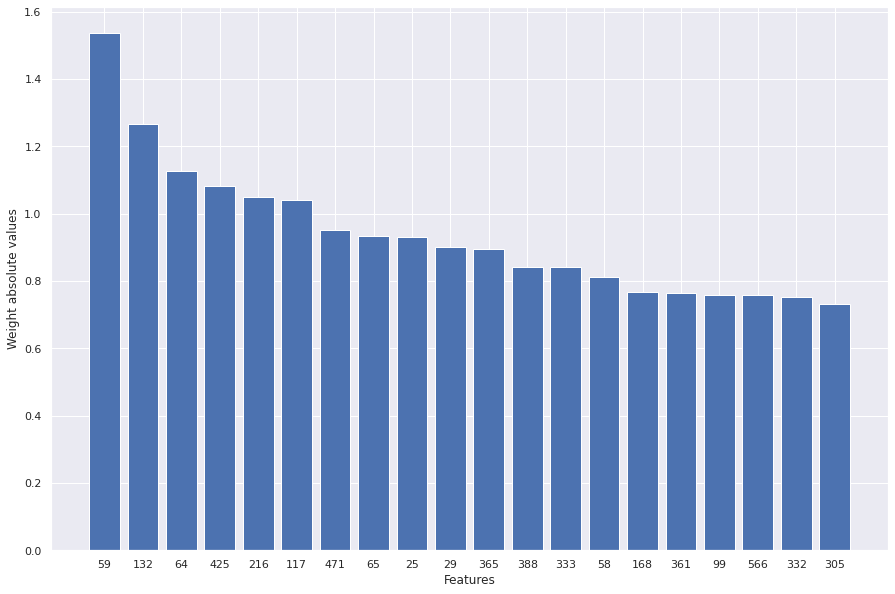

In [42]:
# bar 형태 그래프로 Logistic Regression의 feature 별 중요도를 상위 20개 출력
# 상위 20개의 feature 정보를 출력하기 위하여 sorting을 수행하고 해당 feature 번호를 LR_imort_x에 저장
LR_import_x = [str(i[0]) for i in sorted(enumerate(abs_coef), key=lambda x:x[1], reverse=True)]

plt.bar(LR_import_x[:20], sorted(abs_coef, reverse=True)[:20])

plt.rcParams['figure.figsize'] = (15, 10)
plt.xlabel('Features')
plt.ylabel('Weight absolute values')
plt.show()

#다양한 분류 모델 학습

In [43]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


#여러 모델을 append해서 추가
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('CART', DecisionTreeClassifier()))  # 의사결정트리 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    # fit으로 학습
    model.fit(x_train, y_train)
    
    # %s와 %f는 문자열 포맷팅으로 %s는 문자열, %f는 숫자형 데이터를 말합니다. 
    # 문자열 포맷팅 값은 괄호()안의 값과 대응됩니다.
    # score 함수를 사용하여 모델의 성능을 확인합니다.
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

LDA - train_score : 0.971921, test score : 0.883333
KNN - train_score : 0.934269, test score : 0.548333
CART - train_score : 1.000000, test score : 0.658333
NB - train_score : 0.181238, test score : 0.570000
RF - train_score : 1.000000, test score : 0.500000
SVM - train_score : 0.938098, test score : 0.488333
XGB - train_score : 0.989789, test score : 0.590000


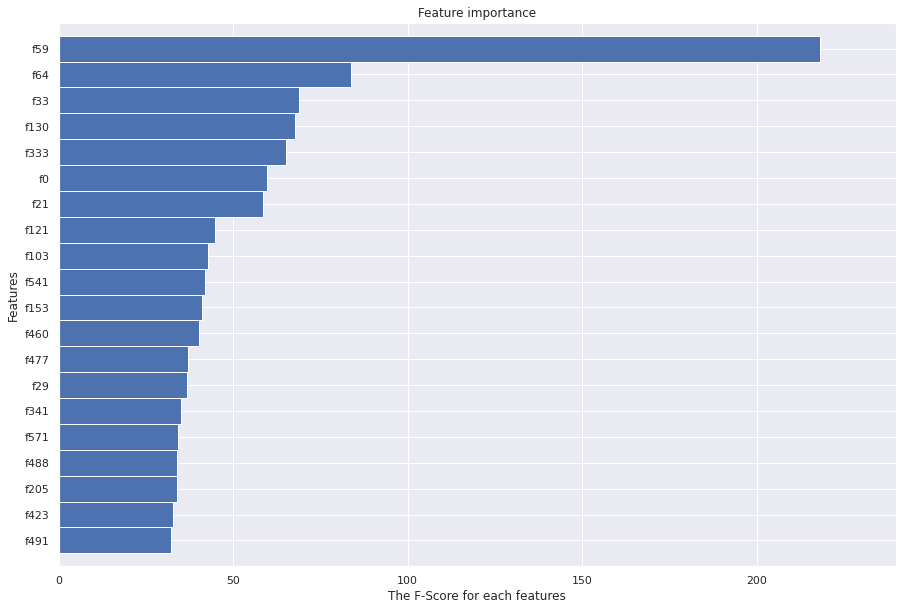

In [44]:
# xgb 모델에서 변수 중요도를 출력
# xgboost 모듈의 plot_importance는 피처 중요도를 시각화할 때 사용
# models[-1][1]는 models 리스트에서 맨 마지막 요소(이것도 리스트)에서 두번째 요소를 말합니다. 
# importance_type는 중요도가 어떻게 계산하는지 확인
# weight는 나온 횟수를 말합니다. gain은 평균적인 이득을 말합니다. cover는 coverage의 평균

xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'total_gain', show_values = False, max_num_features = 20)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Features')
plt.show()

#Confusion Matrix

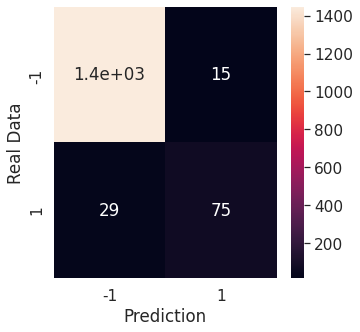

array([[1448,   15],
       [  29,   75]])

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# LinearDiscriminantAnalysis 모델의 confusion matrix를 사용하기 위하여 학습용 데이터의 예측값을 저장합니다.
# models[0]는 LDA
model_predition_train = models[0][1].predict(x_train)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm_train = confusion_matrix(y_train, model_predition_train)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)

# annot은 annotate each cell with numeric value로 셀에 숫자값을 표시하는지 정하는 것입니다. 
# cmap으로 색깔을 지정할 수 있습니다. cmap='RdYlGn_r' cmap="YlGnBu"
ax = sns.heatmap(cm_train, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
ax.set_xticklabels((-1,1))
ax.set_yticklabels((-1,1))
plt.show()
cm_train

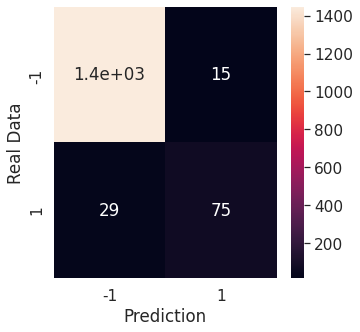

array([[286,   1],
       [ 69, 244]])

In [46]:
# LDA 모델에서 평가용 데이터(x_test, y_test)의 confusion matrix
# LinearDiscriminantAnalysis의 x_test에 대한 예측값을 구하고 confusion_matrix() 를 사용하면 confusion matrix를 구할 수 있습니다.

model_predition_test = models[0][1].predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm_test = confusion_matrix(y_test, model_predition_test)
# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm_train, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
ax.set_xticklabels((-1,1))
ax.set_yticklabels((-1,1))
plt.show()
cm_test

#Precision & Recall

In [49]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력
print("Recall score: {}".format(recall_score(y_test, models[0][1].predict(x_test))))
print("Precision score: {}".format(precision_score(y_test, models[0][1].predict(x_test))))

Recall score: 0.7795527156549521
Precision score: 0.9959183673469387


In [48]:
# 0번부터 9번까지 10개를 출력
for i in range(10): 
    
    # LDA 모델을 사용
    # reshape()에서 -1이 들어간 곳은 가변적으로 바꿉니다. 예를 들어 12개의 원소가 있고 reshape(-1,2)를 하면 열 2개를 맞추기 위해서 행을 6개로 바꿉니다. 
    prediction = models[0][1].predict(x_test[i].reshape(1,-1))
    
    #문자열 포맷팅의 방법입니다. {}가 괄호()안의 값에 각각 대응됩니다. 
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
1 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: -1
2 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
3 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: 1
4 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
5 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
6 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
7 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
8 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
9 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
